In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

# Data and split

In [28]:
np.random.seed(33) 
mapeo_colores = {'A':'green','B':'red'}
N = 100
media_A, desvio_A = 10, 2
media_B, desvio_B = 17, 10


valores_A_X = np.random.normal(loc=media_A, scale=desvio_A, size=N)
valores_A_Y = np.random.normal(loc=media_A, scale=desvio_A, size=N)

valores_B_X = np.random.normal(loc=media_B, scale=desvio_B, size=N)
valores_B_Y = np.random.normal(loc=media_B, scale=desvio_B, size=N)

df = pd.DataFrame({
    'grupo': ['A'] * N + ['B'] * N,
    'X': np.concatenate([valores_A_X, valores_B_X]),
    'Y': np.concatenate([valores_A_Y, valores_B_Y])
})

df_train , df_valid = train_test_split(df,test_size=.8,random_state=4)

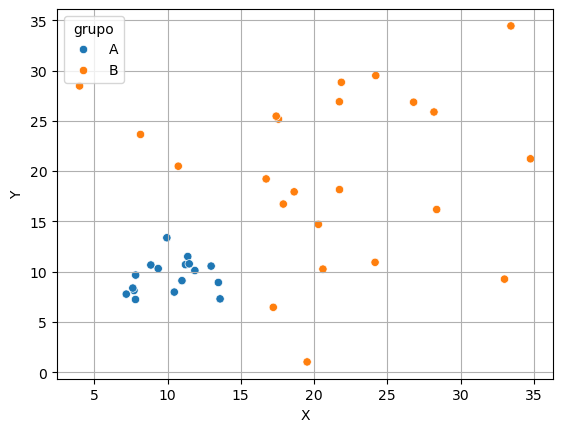

In [29]:
sns.scatterplot(data=df_train, x='X', y='Y', hue='grupo')
plt.grid(True)
plt.show()

# KNN train

In [30]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)

X = df_train[['X', 'Y']]
y = df_train['grupo']

knn.fit(X, y)


KNeighborsClassifier(n_neighbors=25)

# Evaluación 1

media_A, desvio_A = 10, 2
media_B, desvio_B = 13, 3

## Valid con K = 5

In [57]:
X_valid = df_valid[['X', 'Y']]
y_pred = knn.predict(X_valid)
df_valid['predicho'] = y_pred
df_test = df_valid[df_valid['grupo'] != df_valid['predicho']]
df_valid['predicho'] = df_valid['predicho'].map({'A': 0, 'B': 1})


In [58]:
print(df_test)

    grupo          X          Y predicho  target
175     B   6.880806  12.110418        A       1
191     B   9.714315   8.276093        A       1
84      A  14.209769  12.035764        B       0
102     B   9.894183  11.507030        A       1
80      A  11.866946  10.001710        B       0
167     B  12.023356   9.392264        A       1
181     B  11.642243  11.224492        A       1
134     B  12.230629  11.802020        A       1
69      A  11.982272  13.387303        B       0
5       A  10.509749  13.503144        B       0
113     B  14.074887   8.517133        A       1
82      A  13.180859   9.476048        B       0
20      A  13.092061  13.038063        B       0
168     B  11.385502   7.847758        A       1
173     B   7.457471  11.932168        A       1
176     B  12.238910  11.842232        A       1


In [61]:
acc = accuracy_score(df_valid['target'],df_valid['predicho'])
prec = precision_score(df_valid['target'],df_valid['predicho'])
f1_s = f1_score(df_valid['target'],df_valid['predicho'])


print ('Acc:', acc)
print ('Precisión: ',prec)
print ('F1 Score: ', f1_s)

Acc: 0.84
Precisión:  0.8723404255319149
F1 Score:  0.8367346938775511


## Valid con K = 10

In [64]:
X_valid = df_valid[['X', 'Y']]
y_pred = knn.predict(X_valid)
df_valid['predicho'] = y_pred
df_test = df_valid[df_valid['grupo'] != df_valid['predicho']]
df_valid['predicho'] = df_valid['predicho'].map({'A': 0, 'B': 1})

In [65]:
print(df_test)

    grupo          X          Y predicho  target
175     B   6.880806  12.110418        A       1
191     B   9.714315   8.276093        A       1
84      A  14.209769  12.035764        B       0
102     B   9.894183  11.507030        A       1
167     B  12.023356   9.392264        A       1
181     B  11.642243  11.224492        A       1
134     B  12.230629  11.802020        A       1
69      A  11.982272  13.387303        B       0
110     B  12.325436  10.976062        A       1
5       A  10.509749  13.503144        B       0
113     B  14.074887   8.517133        A       1
82      A  13.180859   9.476048        B       0
20      A  13.092061  13.038063        B       0
168     B  11.385502   7.847758        A       1
173     B   7.457471  11.932168        A       1
176     B  12.238910  11.842232        A       1


In [66]:
acc = accuracy_score(df_valid['target'],df_valid['predicho'])
prec = precision_score(df_valid['target'],df_valid['predicho'])
f1_s = f1_score(df_valid['target'],df_valid['predicho'])


print ('Acc:', acc)
print ('Precisión: ',prec)
print ('F1 Score: ', f1_s)

Acc: 0.84
Precisión:  0.8888888888888888
F1 Score:  0.8333333333333334


# Evaluación 2 

media_A, desvio_A = 10, 2
media_B, desvio_B = 17, 10

## Valid con K = 5

In [11]:
X_valid = df_valid[['X', 'Y']]
y_pred = knn.predict(X_valid)
df_valid['predicho'] = y_pred
df_test = df_valid[df_valid['grupo'] != df_valid['predicho']]
df_valid['target'] = df_valid['grupo'].map({'A': 0, 'B': 1})
df_valid['predicho'] = df_valid['predicho'].map({'A': 0, 'B': 1})

In [12]:
df_test

,grupo,X,Y,predicho
175,B,-3.397313,14.034726,A
191,B,6.047716,1.253643,A
102,B,6.647278,12.023432,A
167,B,13.744521,4.974212,A
181,B,12.474143,11.081639,A
134,B,14.435431,13.006734,A
110,B,14.751455,10.253541,A
168,B,11.618340,-0.174141,A
173,B,-1.475096,13.440562,A
176,B,14.463033,13.140775,A


In [13]:
acc = accuracy_score(df_valid['target'],df_valid['predicho'])
prec = precision_score(df_valid['target'],df_valid['predicho'])
f1_s = f1_score(df_valid['target'],df_valid['predicho'])


print ('Acc:', acc)
print ('Precisión: ',prec)
print ('F1 Score: ', f1_s)

Acc: 0.9
Precisión:  1.0
F1 Score:  0.8913043478260869


Esto no es tan bueno tener precisión = 1 ? Que podría tener en cuenta?

## Valid con K = 10

In [15]:
X_valid = df_valid[['X', 'Y']]
y_pred = knn.predict(X_valid)
df_valid['predicho'] = y_pred
df_test = df_valid[df_valid['grupo'] != df_valid['predicho']]
df_valid['target'] = df_valid['grupo'].map({'A': 0, 'B': 1})
df_valid['predicho'] = df_valid['predicho'].map({'A': 0, 'B': 1})

In [16]:
acc = accuracy_score(df_valid['target'],df_valid['predicho'])
prec = precision_score(df_valid['target'],df_valid['predicho'])
f1_s = f1_score(df_valid['target'],df_valid['predicho'])


print ('Acc:', acc)
print ('Precisión: ',prec)
print ('F1 Score: ', f1_s)

Acc: 0.9
Precisión:  1.0
F1 Score:  0.8913043478260869


# Evaluación 3 - Menor % train_split

In [31]:
X_valid = df_valid[['X', 'Y']]
y_pred = knn.predict(X_valid)
df_valid['predicho'] = y_pred
df_test = df_valid[df_valid['grupo'] != df_valid['predicho']]
df_valid['target'] = df_valid['grupo'].map({'A': 0, 'B': 1})
df_valid['predicho'] = df_valid['predicho'].map({'A': 0, 'B': 1})

In [32]:
acc = accuracy_score(df_valid['target'],df_valid['predicho'])
prec = precision_score(df_valid['target'],df_valid['predicho'])
f1_s = f1_score(df_valid['target'],df_valid['predicho'])


print ('Acc:', acc)
print ('Precisión: ',prec)
print ('F1 Score: ', f1_s)

Acc: 0.775
Precisión:  1.0
F1 Score:  0.6949152542372882


In [34]:

print(confusion_matrix(df_valid['target'], df_valid['predicho']))
print(classification_report(df_valid['target'], df_valid['predicho']))

[[83  0]
 [36 41]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        83
           1       1.00      0.53      0.69        77

    accuracy                           0.78       160
   macro avg       0.85      0.77      0.76       160
weighted avg       0.84      0.78      0.76       160

